In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('https://github.com/Mitko208/PythonTraining/raw/main/Lecture40/Homework/laptop_price.csv', encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [49]:
df.shape

(1303, 13)

In [50]:
# Convert Categorical => Numerical
df_label_encoded = df.copy()
label_encoders = {}

for column in df_label_encoded.select_dtypes(include=['object']).columns:
     label_encoders[column] = LabelEncoder()
     df_label_encoded[column] = label_encoders[column].fit_transform(df_label_encoded[column])

df_label_encoded

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,58,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,51,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,53,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,9,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,59,8,38,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,580,0,14.0,13,89,5,4,47,5,78,638.00
1299,1317,10,588,0,13.3,19,89,1,29,47,5,41,1499.00
1300,1318,10,196,3,14.0,0,34,3,35,40,5,56,229.00
1301,1319,7,2,3,15.6,0,89,7,10,21,5,104,764.00


In [51]:
# Analyze correlations
corr = df_label_encoded.corr()
corr

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,1.000000,0.106702,0.026869,-0.083170,-0.087796,-0.040251,-0.054633,-0.042326,0.042962,-0.006203,0.016616,-0.040933,0.067830
Company,0.106702,1.000000,0.067234,-0.007718,-0.085784,0.094772,0.044593,-0.008399,0.048086,0.026537,0.134290,-0.159906,0.140371
Product,0.026869,0.067234,1.000000,0.065594,-0.218974,0.176393,0.143855,0.018305,0.088667,0.094795,0.120562,-0.204379,0.139289
TypeName,-0.083170,-0.007718,0.065594,1.000000,-0.077428,-0.175618,-0.128174,0.213988,0.019091,-0.204774,0.085223,-0.211832,-0.127313
Inches,-0.087796,-0.085784,-0.218974,-0.077428,1.000000,-0.247841,0.153041,-0.149706,-0.193382,0.215710,0.034528,0.866304,0.068197
ScreenResolution,-0.040251,0.094772,0.176393,-0.175618,-0.247841,1.000000,0.232751,0.019858,0.059042,0.160816,0.070360,-0.218135,0.331327
Cpu,-0.054633,0.044593,0.143855,-0.128174,0.153041,0.232751,1.000000,-0.077176,-0.013264,0.490761,0.125374,0.139861,0.529334
Ram,-0.042326,-0.008399,0.018305,0.213988,-0.149706,0.019858,-0.077176,1.000000,-0.248580,-0.138212,0.008627,-0.174577,-0.254032
Memory,0.042962,0.048086,0.088667,0.019091,-0.193382,0.059042,-0.013264,-0.248580,1.000000,-0.020784,0.035574,-0.218299,0.185680
Gpu,-0.006203,0.026537,0.094795,-0.204774,0.215710,0.160816,0.490761,-0.138212,-0.020784,1.000000,0.103853,0.274961,0.443299


<Axes: >

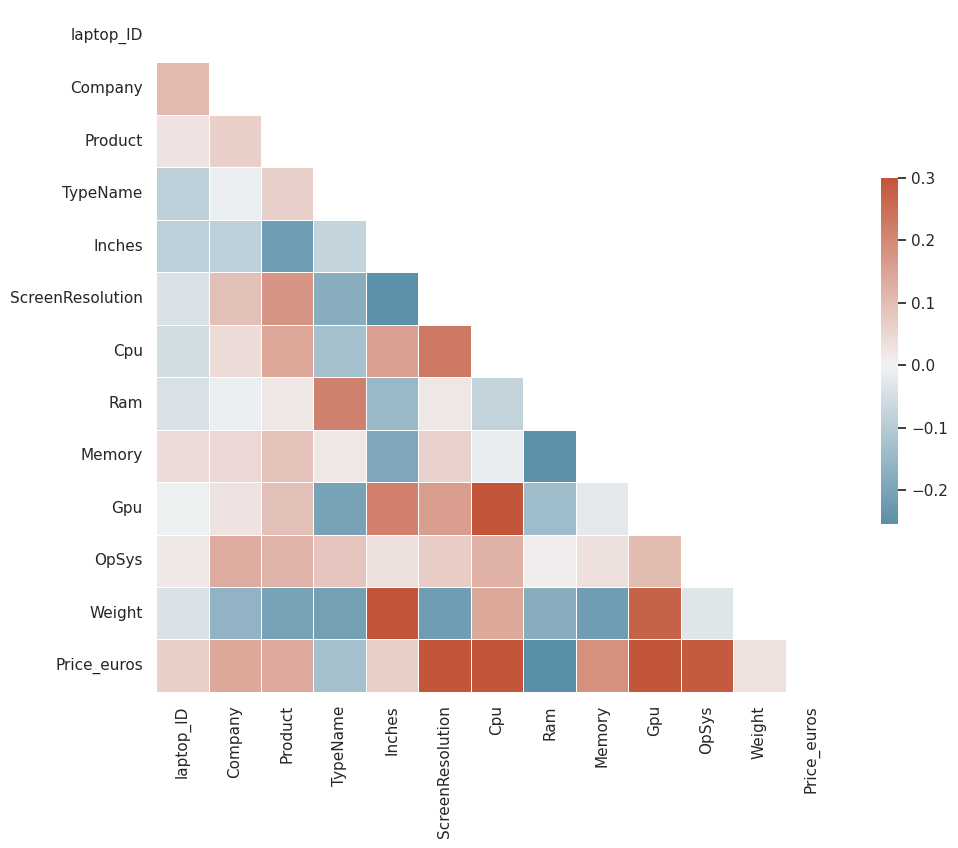

In [52]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
X = df_label_encoded[['Cpu','Gpu','ScreenResolution','OpSys']]
y = df_label_encoded['Price_euros']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (977, 4)
X_test shape: (326, 4)
y_train shape: (977,)
y_test shape: (326,)


In [55]:
# print(f'X train nan: {X_train.isna().sum()}')
# print(f'X test nan: {X_test.isna().sum()}')
# print(f'y train nan: {y_train.isna().sum()}')
# print(f'y test nan: {y_test.isna().sum()}')

X train nan: Cpu                 0
Gpu                 0
ScreenResolution    0
OpSys               0
dtype: int64
X test nan: Cpu                 0
Gpu                 0
ScreenResolution    0
OpSys               0
dtype: int64
y train nan: 0
y test nan: 0


In [65]:
X_train

,Cpu,Gpu,ScreenResolution,OpSys
285,97,53,13,5
1139,89,47,8,7
1234,62,51,0,3
526,97,66,8,5
266,106,61,7,5
...,...,...,...,...
1095,74,86,8,5
1130,97,53,0,5
1294,12,29,8,5
860,74,53,15,5


In [56]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression().fit(X_train,y_train)

In [13]:
print(lm.intercept_)        #ScreenResolution 825.3506021271352, 31.533155212502955; Cpu 23.605092335142444, 14.222956297951978; Memory 834.3531940666269,17.20327995713514
print(lm.coef_)          # Gpu 365.1106340446021, 13.90082825202884; Weight 1129.7436890755448, -0.16528834376674678


# z = b0 + b1*x1 + b2*x2 + b3*x3 +b4*x4
# z =  -831.71 + 9.05*Cpu + b2*x2 + b3*x3 +b4*x4

-831.7085835075009
[  9.05311111   7.01692848  20.46175747 142.75356591]


In [69]:
y_train

285      659.00
1139    2171.72
1234     959.00
526      799.00
266     1499.00
         ...   
1095     799.00
1130     629.00
1294     549.99
860      850.66
1126     479.00
Name: Price_euros, Length: 977, dtype: float64

In [66]:
# TODO: Plotting the regression line with scatter points for CPU vs Price
sns.regplot(x='Cpu', y='Price', data=pd.concat([X_train, y_train], axis=1))

# Display the plot
plt.title('Regression Line with Scatter for CPU vs. Price')
plt.xlabel('CPU (GHz)')
plt.ylabel('Price ($)')
plt.show()

KeyError: 'Price'

<function matplotlib.pyplot.show(close=None, block=None)>

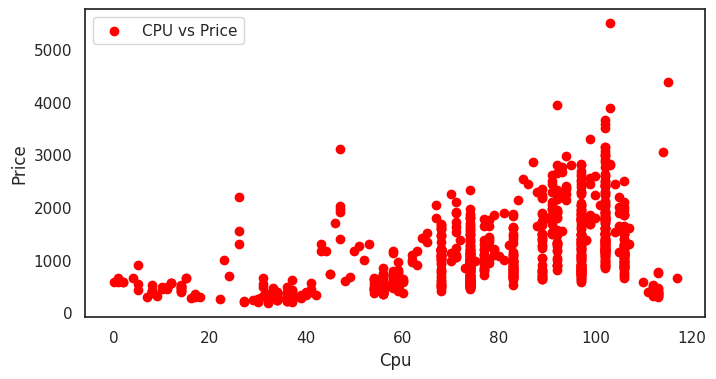

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
fig.dpi = 100

# tmp= np.arange(0,len(X_train),1)
# tmp2= np.arange(0,len(X_test),1)

ax.scatter(x=X_train['Cpu'], y=y_train, color = 'red', label="CPU vs Price")
# ax.scatter(tmp2, y_test, color = 'grey', label='Test')
# ax.plot(X_train, lm.predict(X_train), color = 'blue',alpha=0.5)
ax.legend()
ax.set_xlabel('Cpu')
ax.set_ylabel('Price')
plt.show


In [15]:
y_pred = lm.predict(X_test)

In [16]:
# Predictions on training data
y_train_pred = lm.predict(X_train)

# Predictions on testing data
y_test_pred = lm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Data Metrics:")
print(f"MAE: {train_mae:.2f}")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R-squared: {train_r2:.2f}")

print("\nTesting Data Metrics:")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R-squared: {test_r2:.2f}")

Training Data Metrics:
MAE: 391.21
MSE: 271611.82
RMSE: 521.16
R-squared: 0.43

Testing Data Metrics:
MAE: 414.59
MSE: 343112.51
RMSE: 585.76
R-squared: 0.35


In [17]:
# Calculate the Range and Mean of the Target Variable:
print(f'MAE: {test_mae}')

y_true = df['Price_euros']

# Calculate the range and mean of the target variable
target_range = np.max(y_true) - np.min(y_true)
target_mean = np.mean(y_true)

# Relative MAE compared to range
relative_mae_range = test_mae / target_range
print(f"Relative MAE to range: {relative_mae_range:.4f}")

# Relative MAE compared to mean
relative_mae_mean = test_mae / target_mean
print(f"Relative MAE to mean: {relative_mae_mean:.4f}")

# Evaluate against a baseline model (mean predictor)
baseline_prediction = np.mean(y_true)
baseline_mae = mean_absolute_error(y_true, np.full_like(y_true, baseline_prediction))
print(f"Baseline MAE: {baseline_mae:.4f}")

# Comparing MAE with baseline
improvement_over_baseline = (baseline_mae - test_mae) / baseline_mae
print(f"Improvement over baseline: {improvement_over_baseline:.4%}")

MAE: 414.5892993233014
Relative MAE to range: 0.0700
Relative MAE to mean: 0.3690
Baseline MAE: 534.8909
Improvement over baseline: 22.4909%
